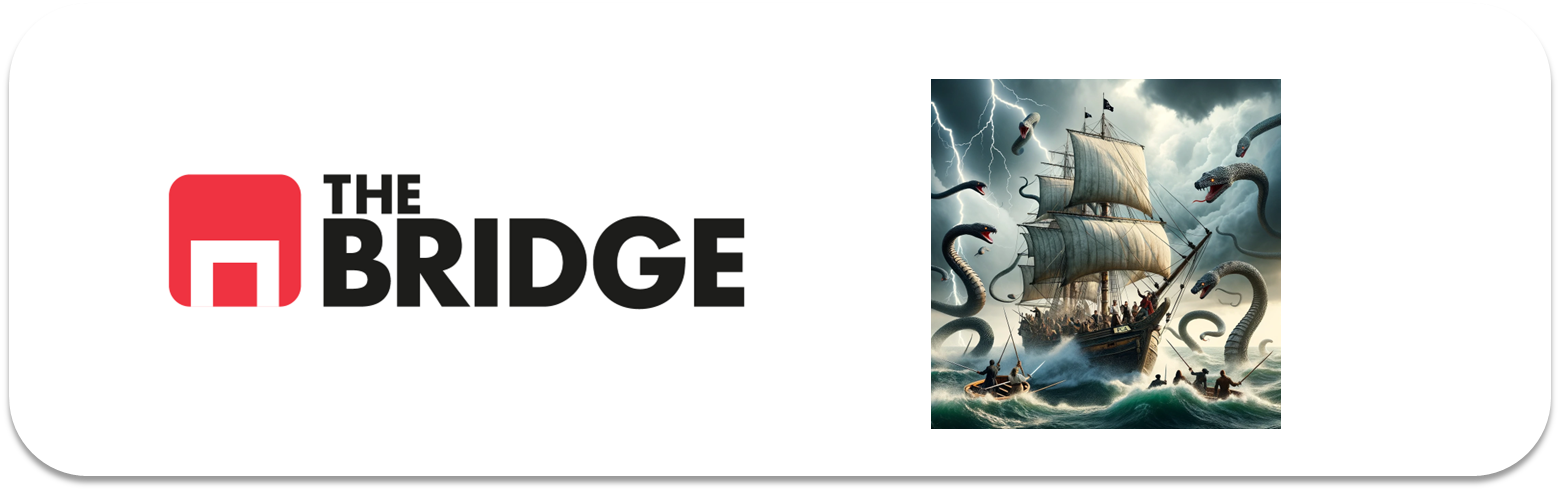

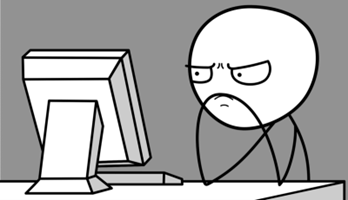

Para ejercitarte y afianzar lo aprendido sobre **Seleccion de Features**, completa los siguientes ejercicios. Recuerda que necesitarás datos que están en el directorio data que acompaña al notebook (búscalo en el repositorio de ejercicios)
  
La solución a los mismos las tienes ya, intenta no mirarlos de primeras pero no dejes de hacerlo cuando hayas terminado por si te pudieran aportar.

## Feature selection: Breast Cancer Winsconsin

El objetivo de este grupo de ejercicio es dar a entender la importancia de la selección de características (features), así como probar distintos métodos de reducción de características (features) y qué influencia puede tener el reducir features en el perfomance de un modelo. Nuestro target para evaluar el perfomance será si estamos ante tumores malignos o benignos.

Vamos a trabajar con el dataset de Breast Cancer Winsconsin, datos tomados a partir de radiografías.

### Ejercicio 0

Importa los paquetes y módulos que necesites a lo largo del notebook

In [1]:
import bootcampviztools as bt
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.feature_selection import SelectKBest, f_classif

#import warnings library
import warnings
# ignore all warnings
warnings.filterwarnings('ignore')

### Ejercicio 1:

Carga los datos y haz una primera inspección de los mismos y comenta lo que creas conveniente sobre las features y su relación entre sí (pero sin analizarlas numéricamente)

In [2]:
df_breast_cancer = pd.read_csv('data/breastcancer-winsconsin.csv')
df_breast_cancer.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [3]:
df_breast_cancer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

Habríaque reducir el nº de columnas, son demasiadas. Y quitar también el índice y la última, que tiene muchos nulos

### Ejercicio 2:

Descarta las características que evidentemente no aportan información.

In [4]:
df_breast_cancer.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,0.0
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,NaN
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,NaN
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,NaN
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,NaN
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,NaN
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,NaN
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,NaN


In [5]:
df_breast_cancer = df_breast_cancer.drop(['id', 'Unnamed: 32'], axis=1)
df_breast_cancer.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


### Ejercicio 3: 

Divide en train y test. Analiza el target de forma breve.

In [6]:
train_set, test_set = train_test_split(df_breast_cancer, test_size=0.3, random_state=42)

In [7]:
target = "diagnosis"

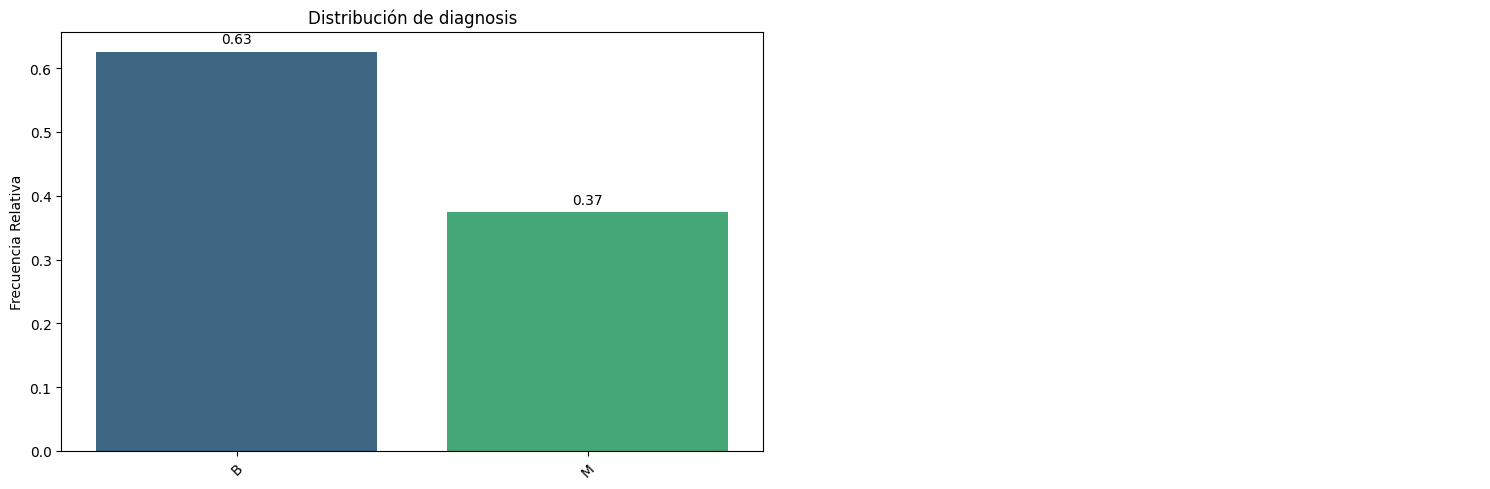

In [8]:
bt.pinta_distribucion_categoricas(train_set, [target], mostrar_valores= True, relativa= True)

### Ejercicio 4: MiniEDA (I) Análisis Visual

Realiza un análisis visual de las features y haz tu selección de primera "división" (que luego usaremos para comparar con otros métodos de selección).

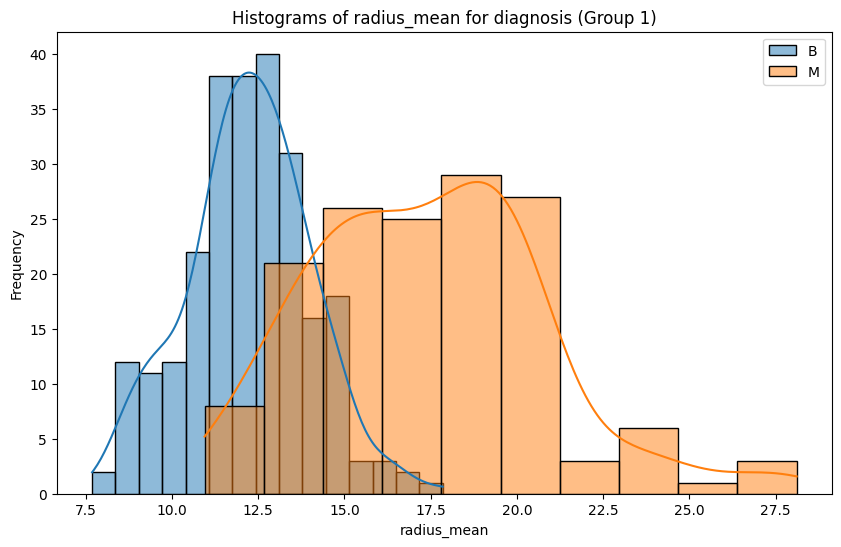

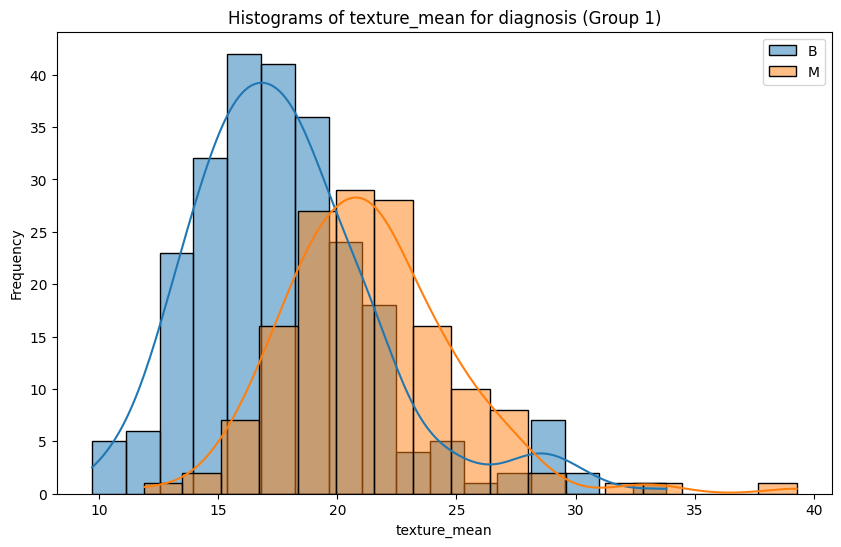

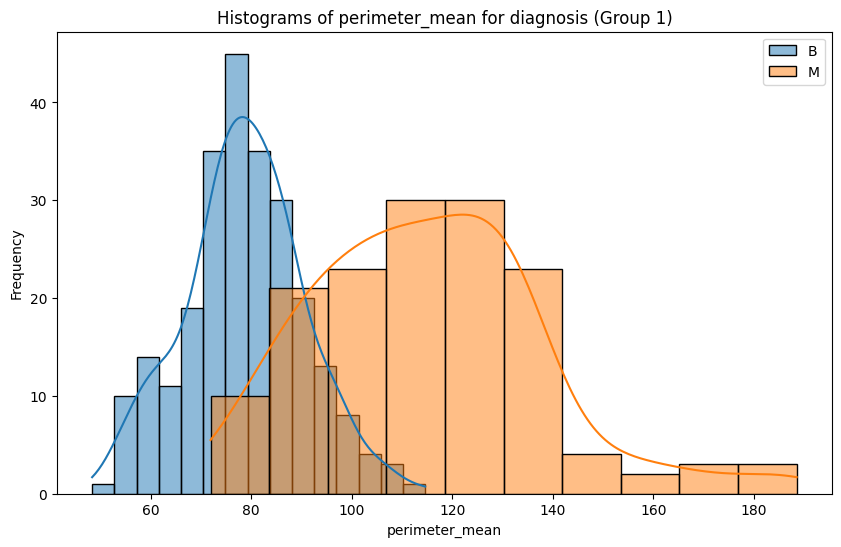

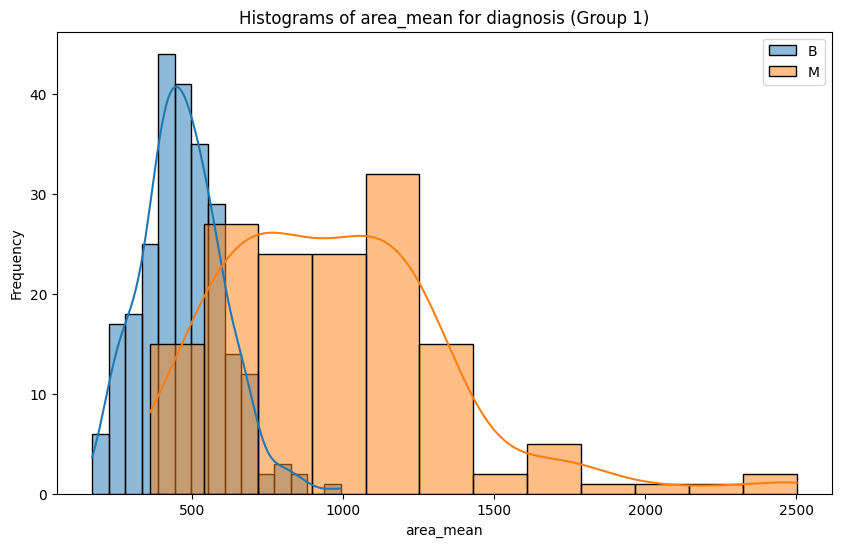

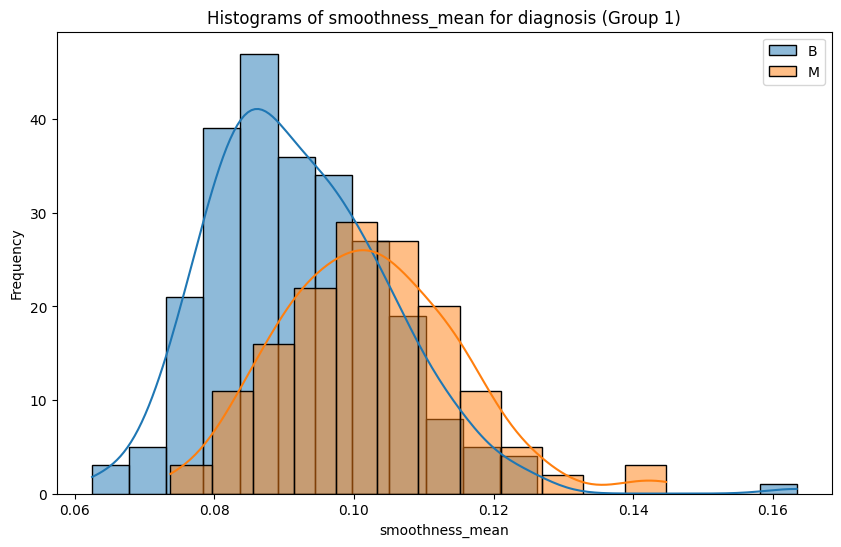

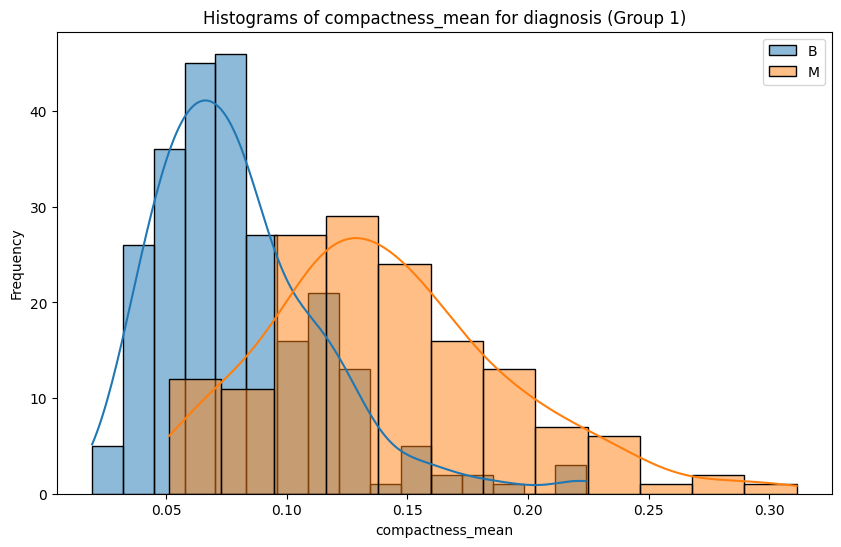

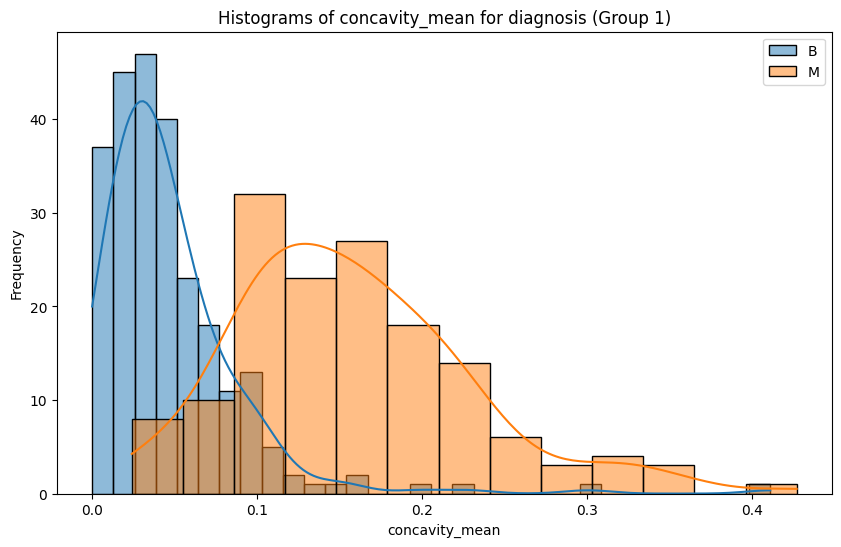

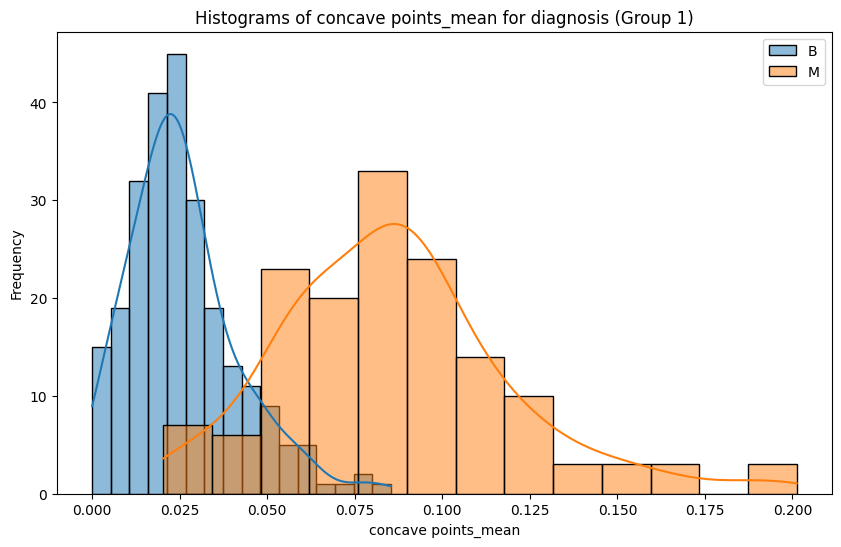

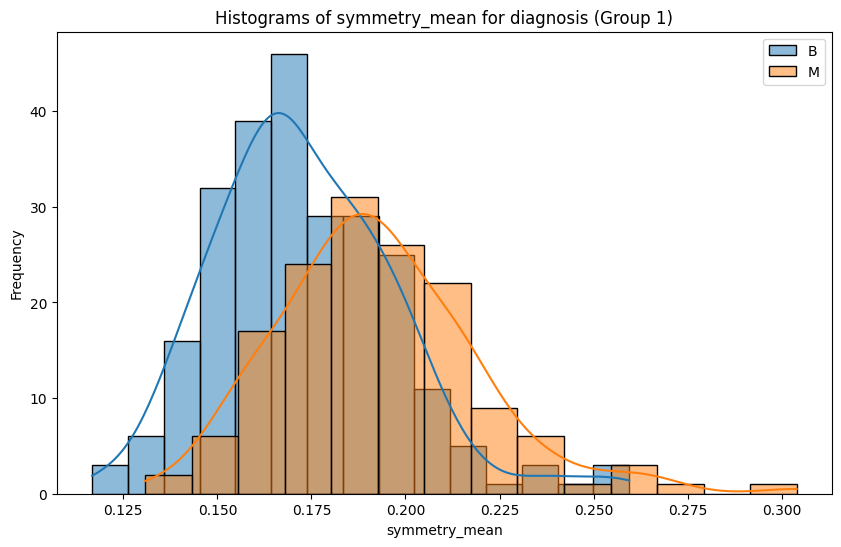

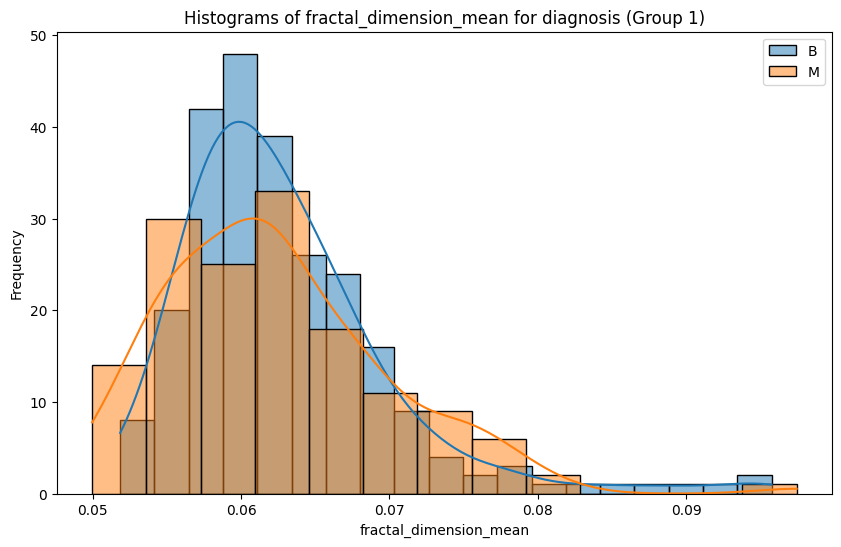

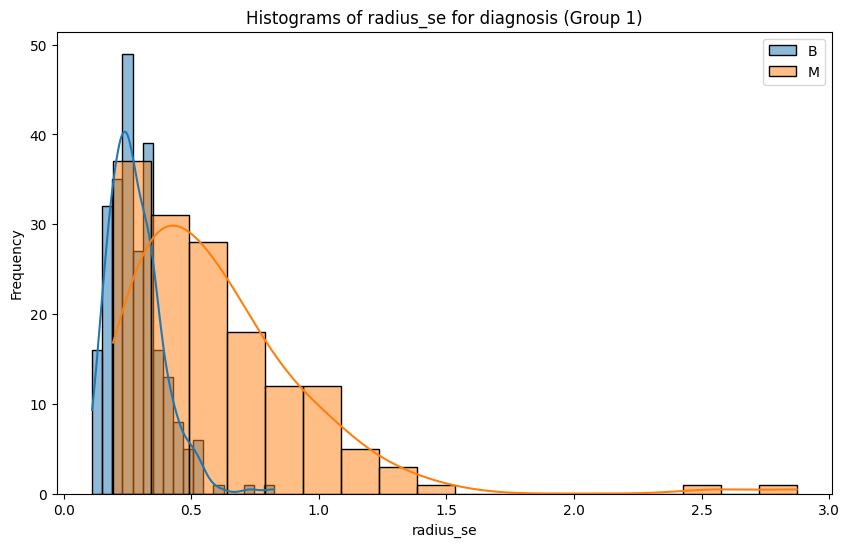

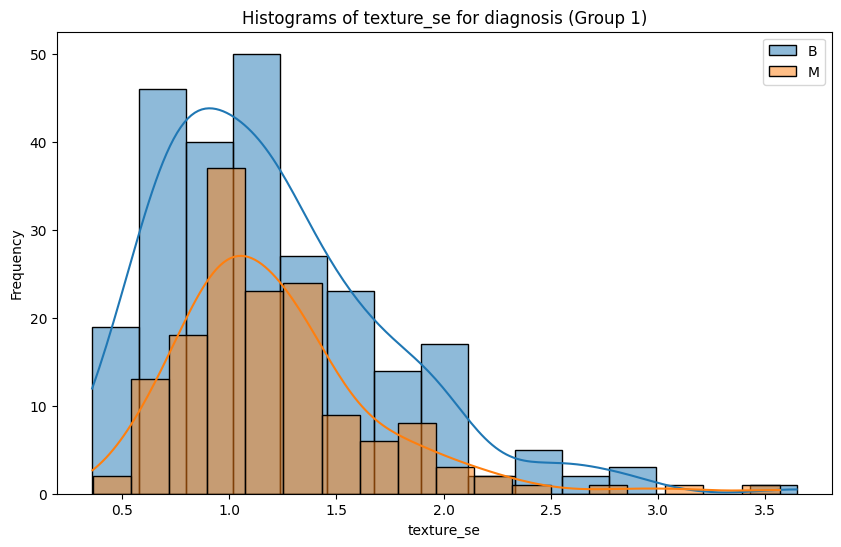

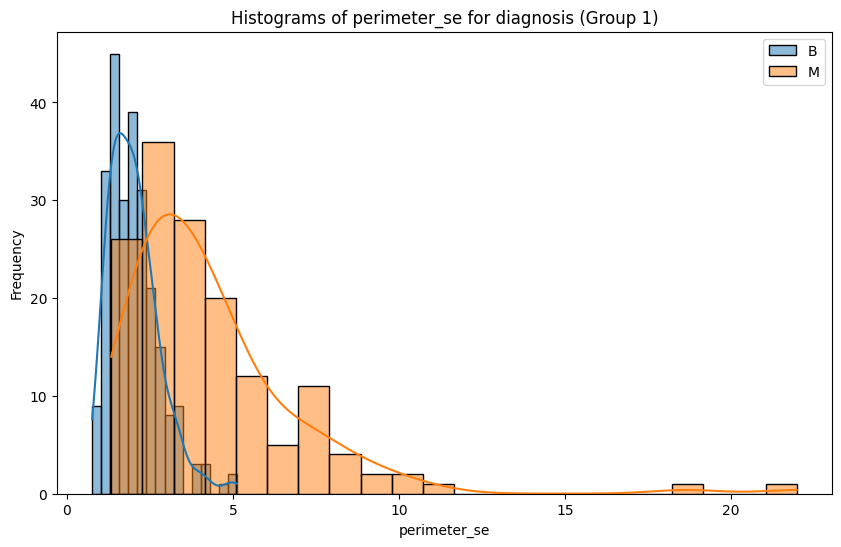

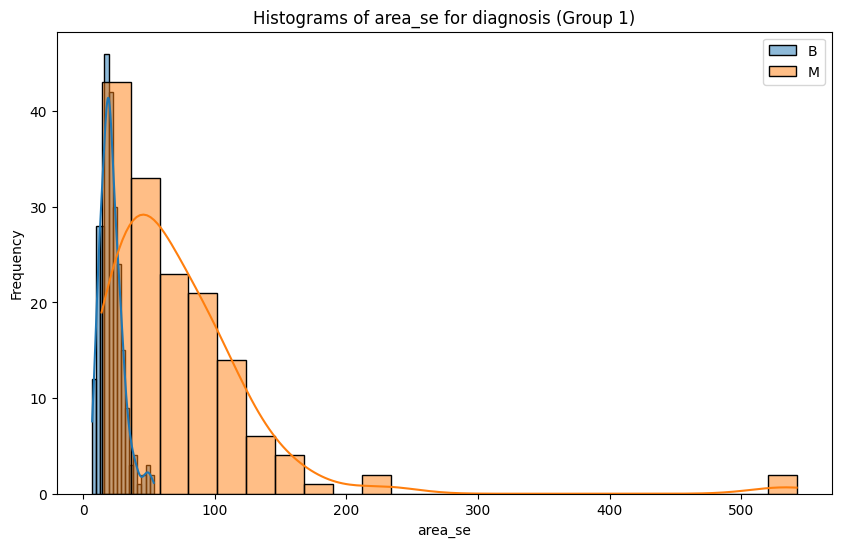

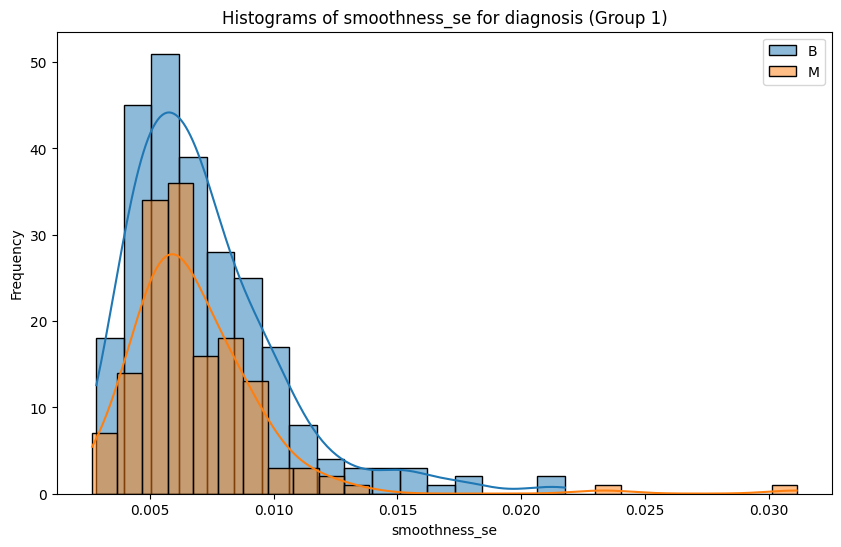

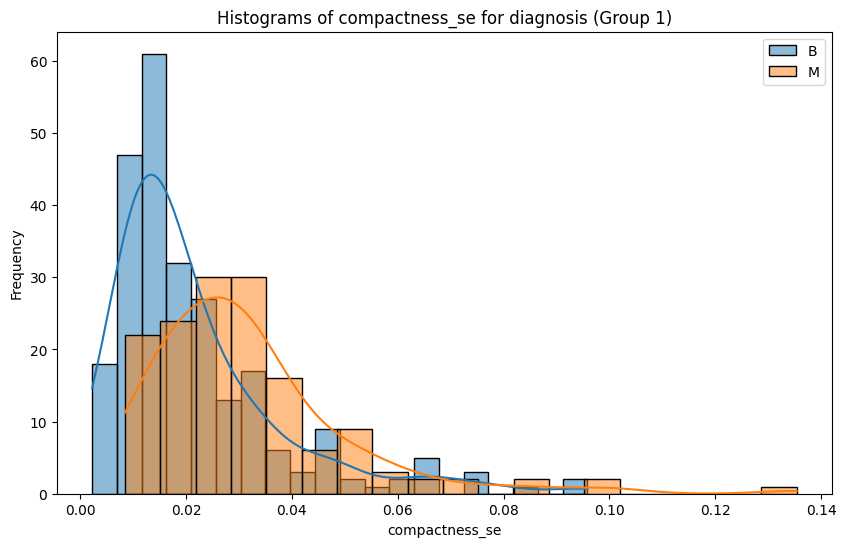

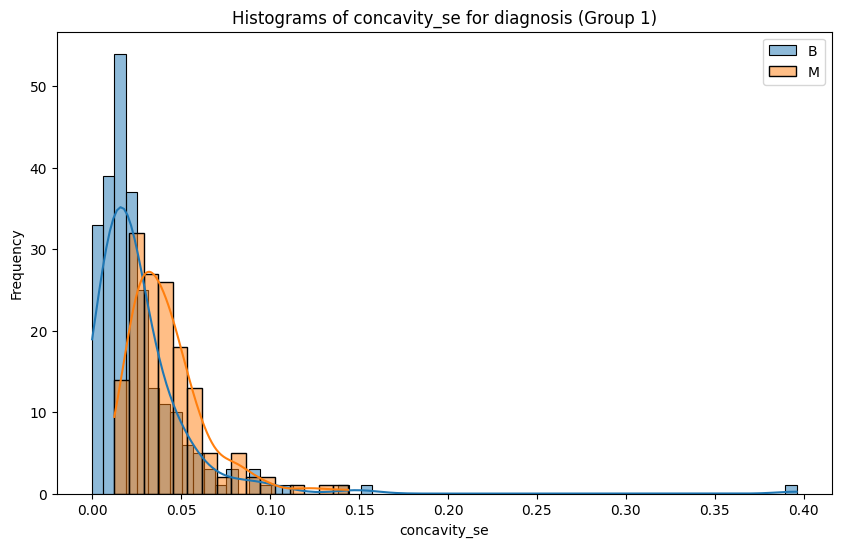

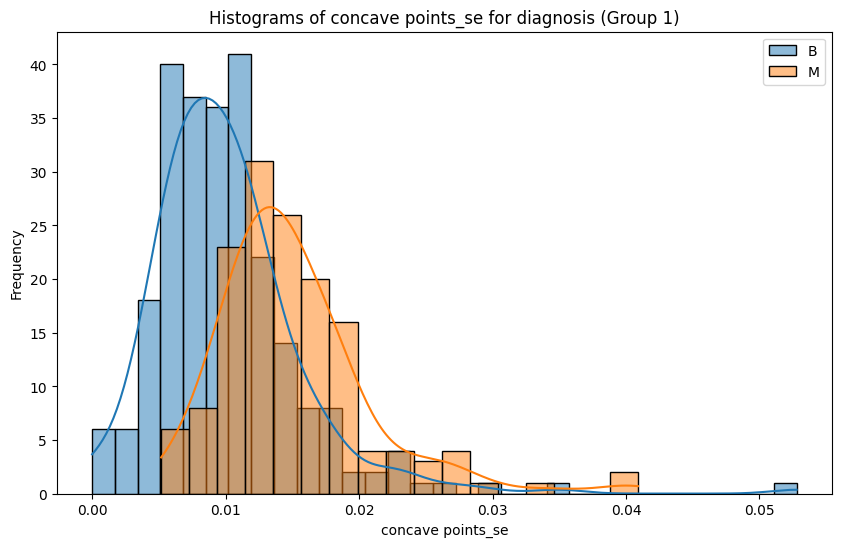

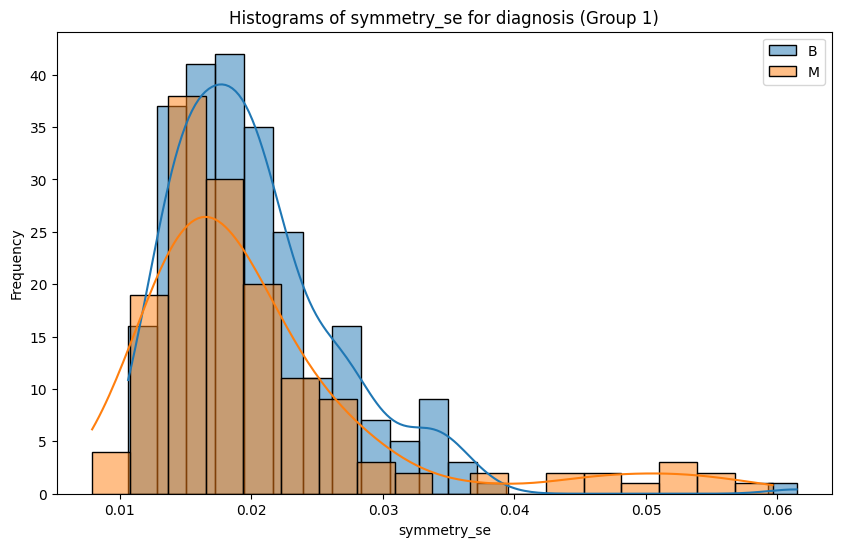

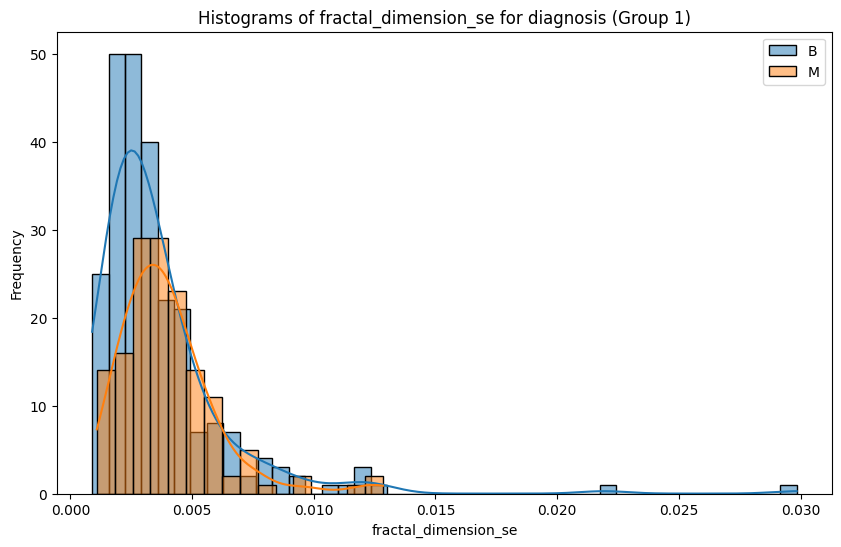

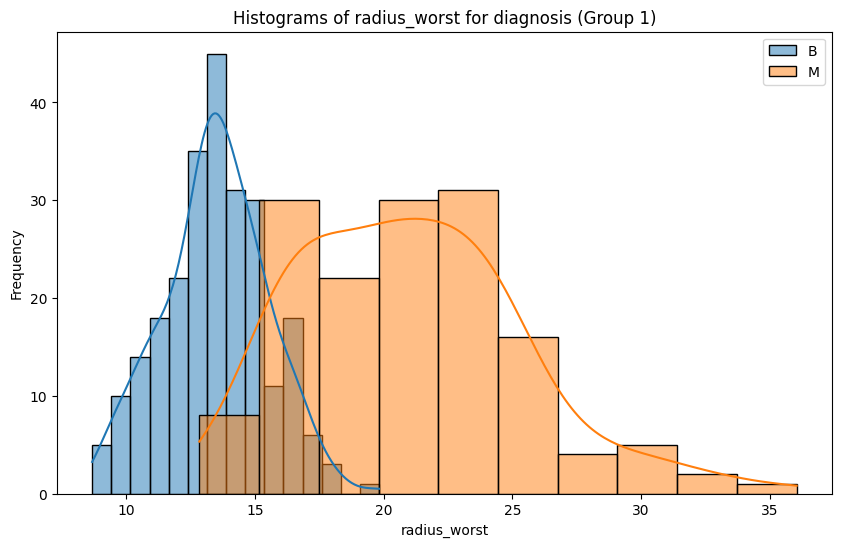

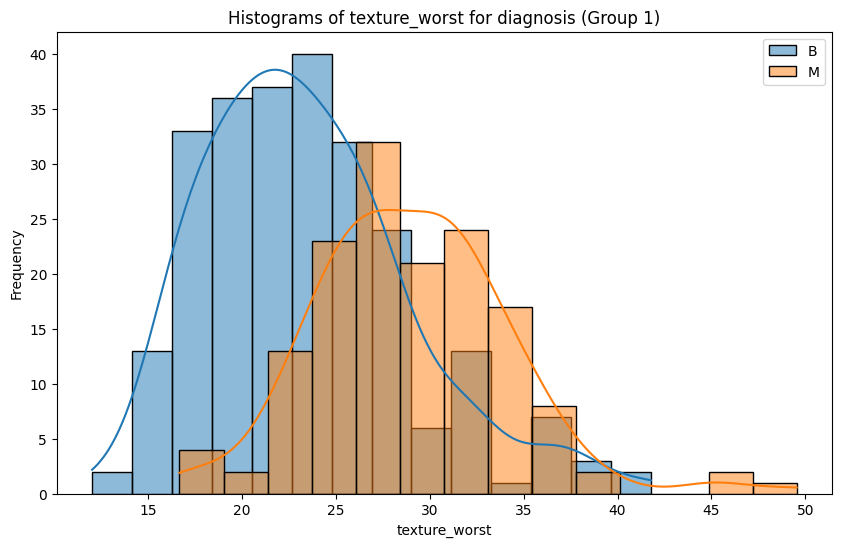

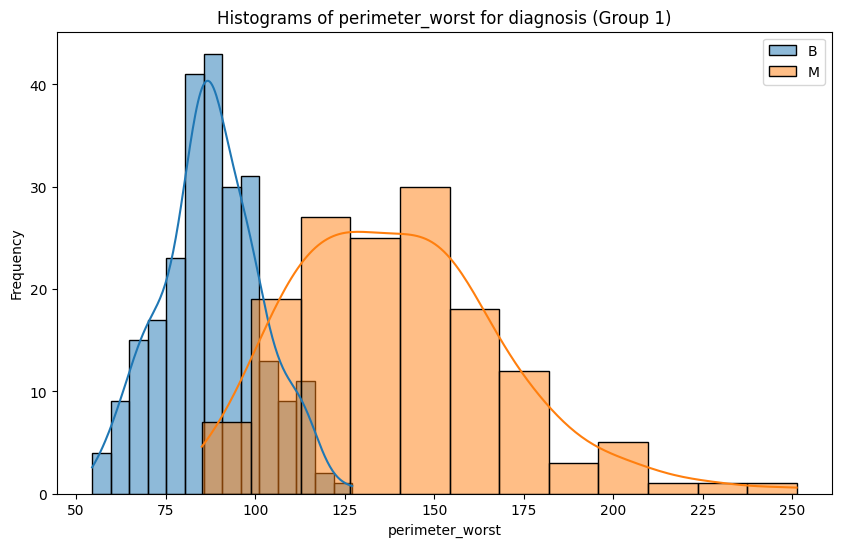

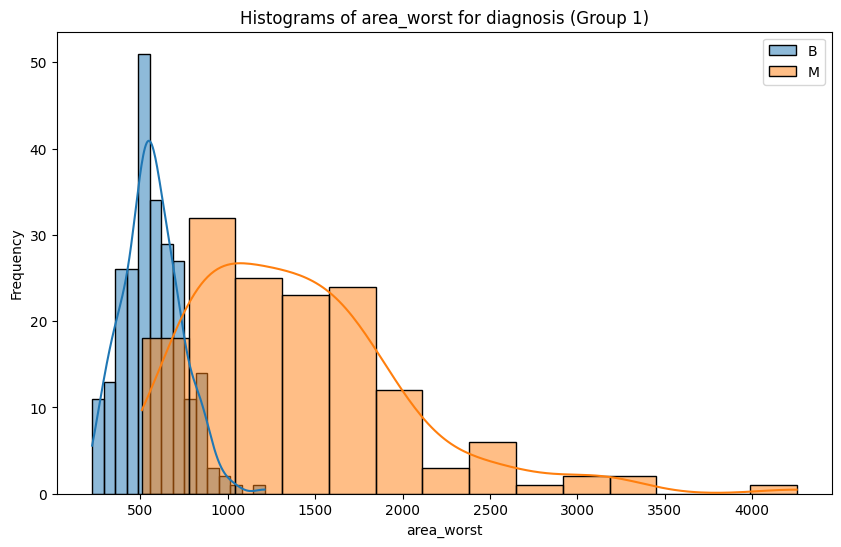

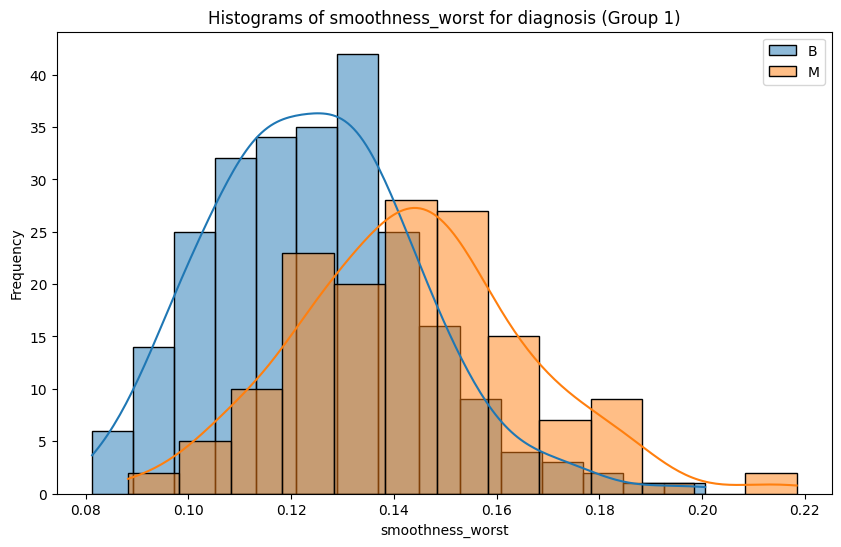

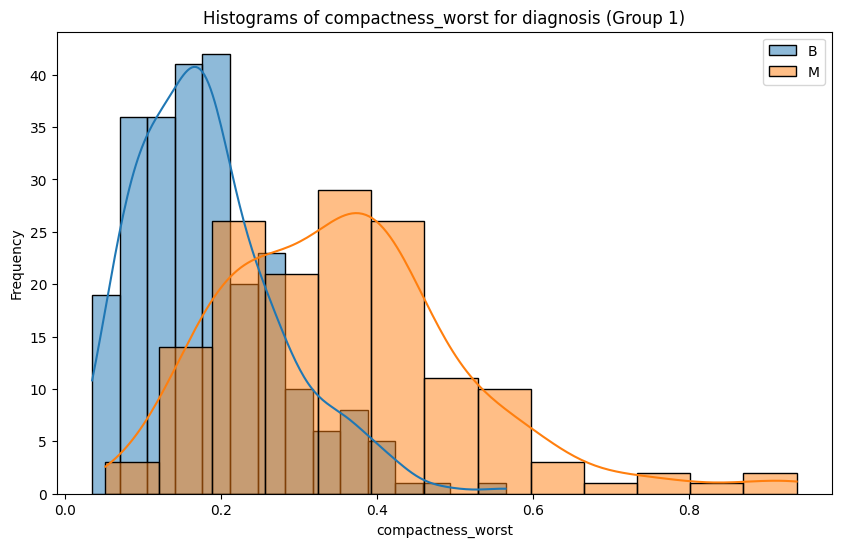

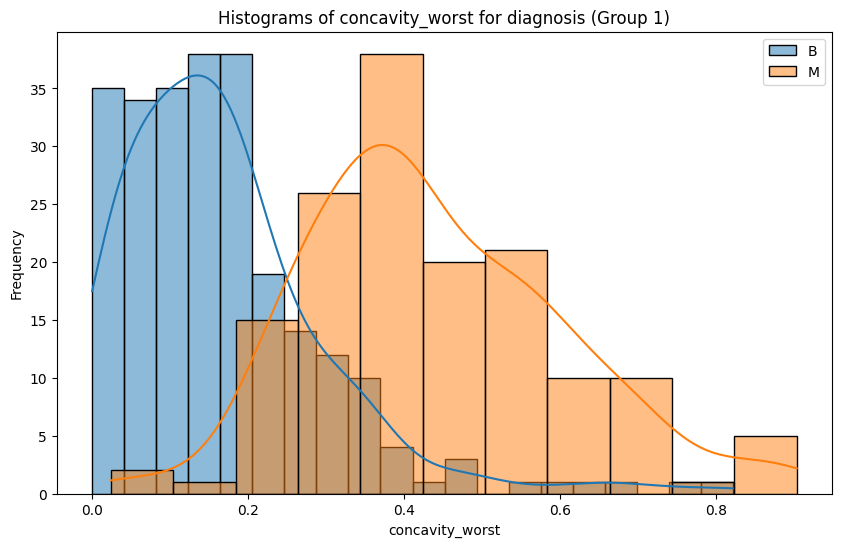

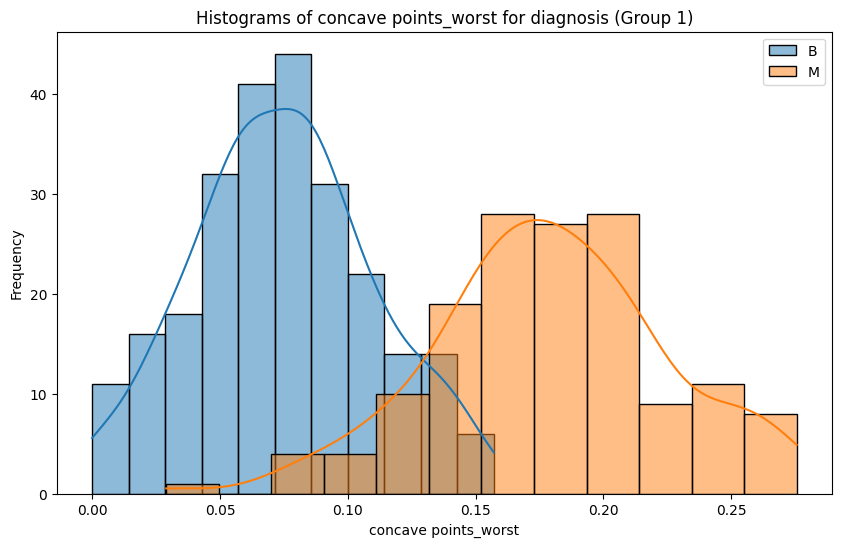

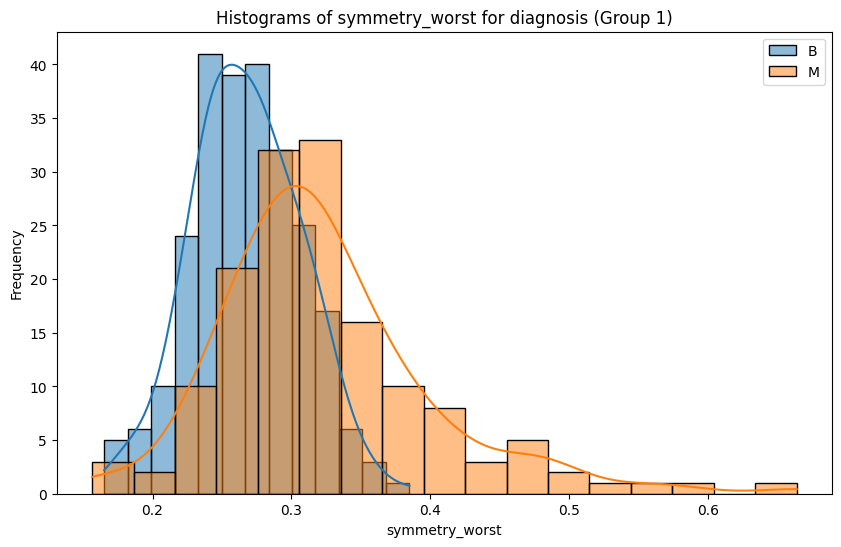

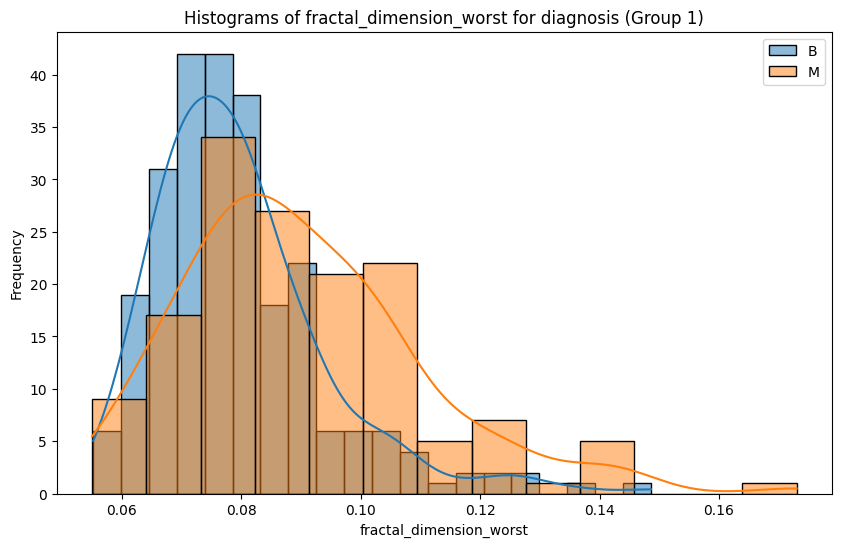

In [9]:
for col in train_set.columns:
    if col != target:
        bt.plot_grouped_histograms(train_set, target, col, group_size = 2)

In [10]:
features = ["texture_se","smoothness_se","simmetry_se","fractal_dimension_se"]

In [11]:
features_visual = [col for col in train_set.columns if col not in features]
features_visual.remove(target)

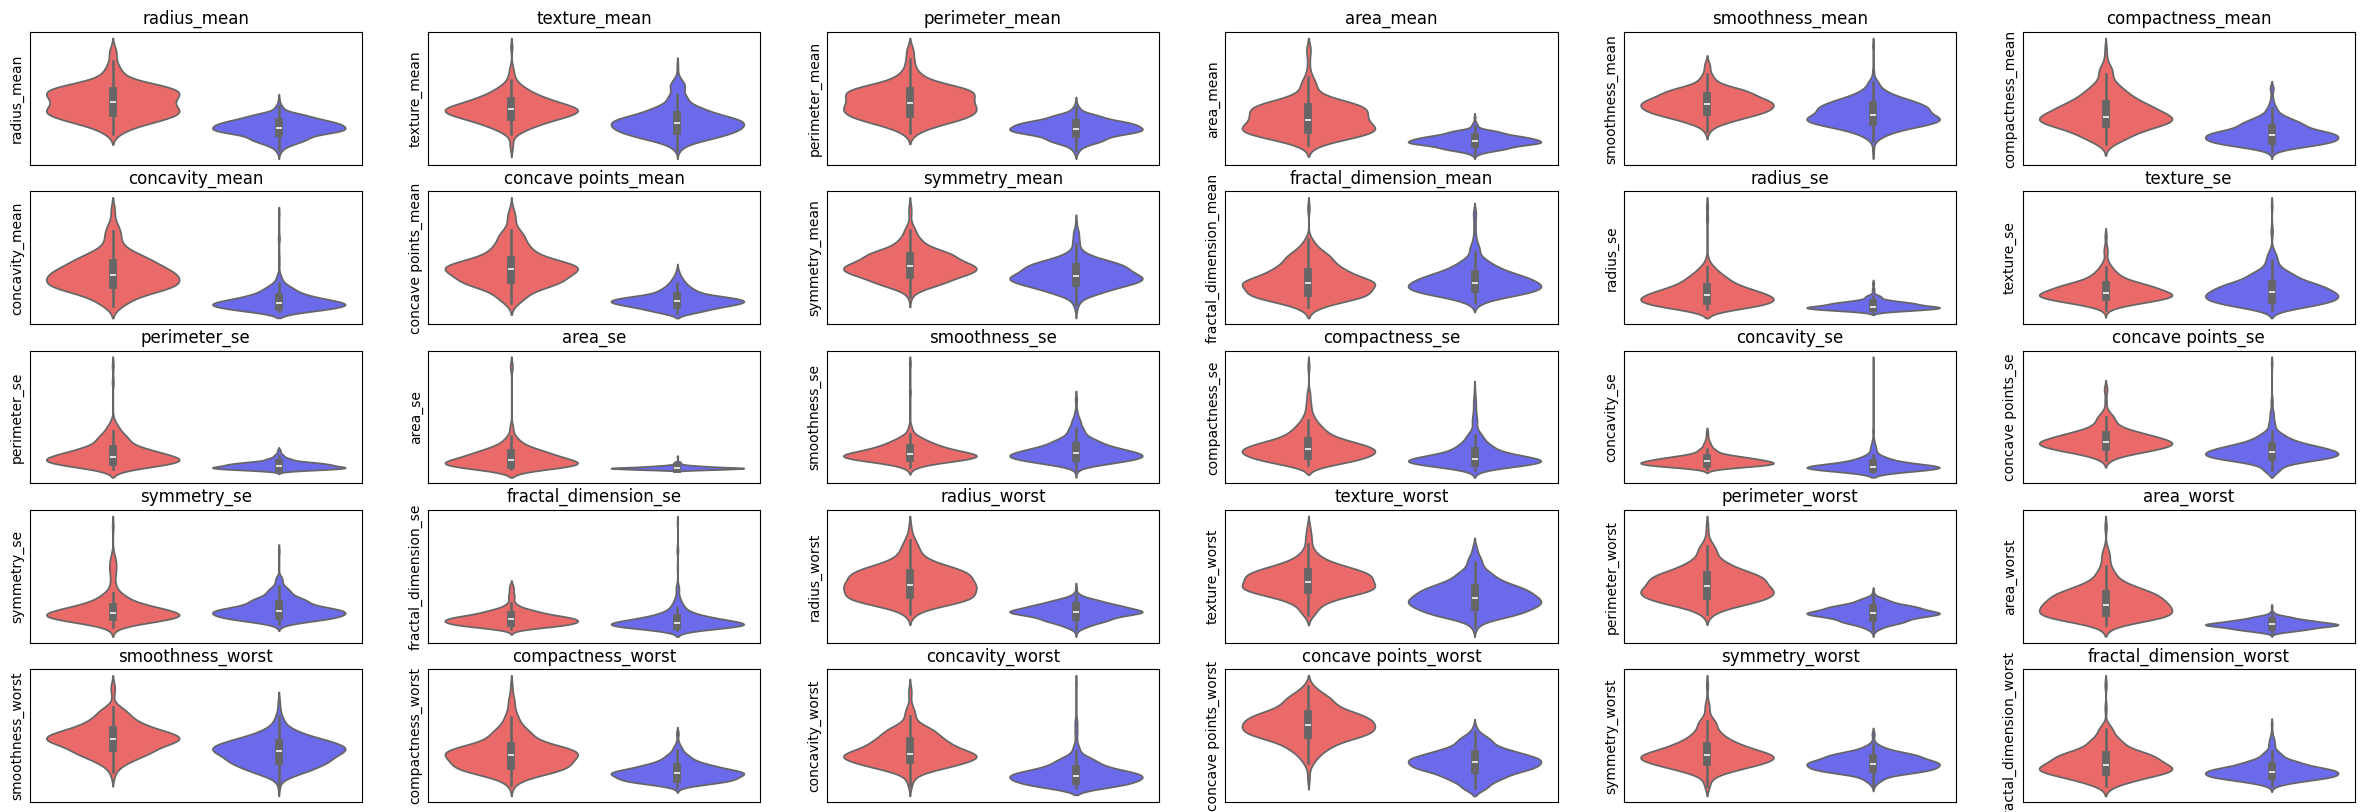

In [12]:
#Violin plot para ver la distribución de las variables numéricas vs diagnosis
plt.figure(figsize=(30, 10))
for i, col in enumerate(df_breast_cancer.columns[1:]):
    plt.subplot(5, 6, i+1)
    sns.violinplot(data = df_breast_cancer, x = 'diagnosis', y = col, palette='seismic_r')
    plt.title(col)
    plt.xticks([])
    plt.yticks([])
    plt.xlabel('')

### Ejercicio 5

Observa correlaciones entre las features. Utiliza un gráfico apropiado para ello. ¿Crees que sea posible eliminar algunas features para mejorar el modelo? (No hace falta que lo hagas ahora, lo haremos si es necesario en un ejercicio posterior)

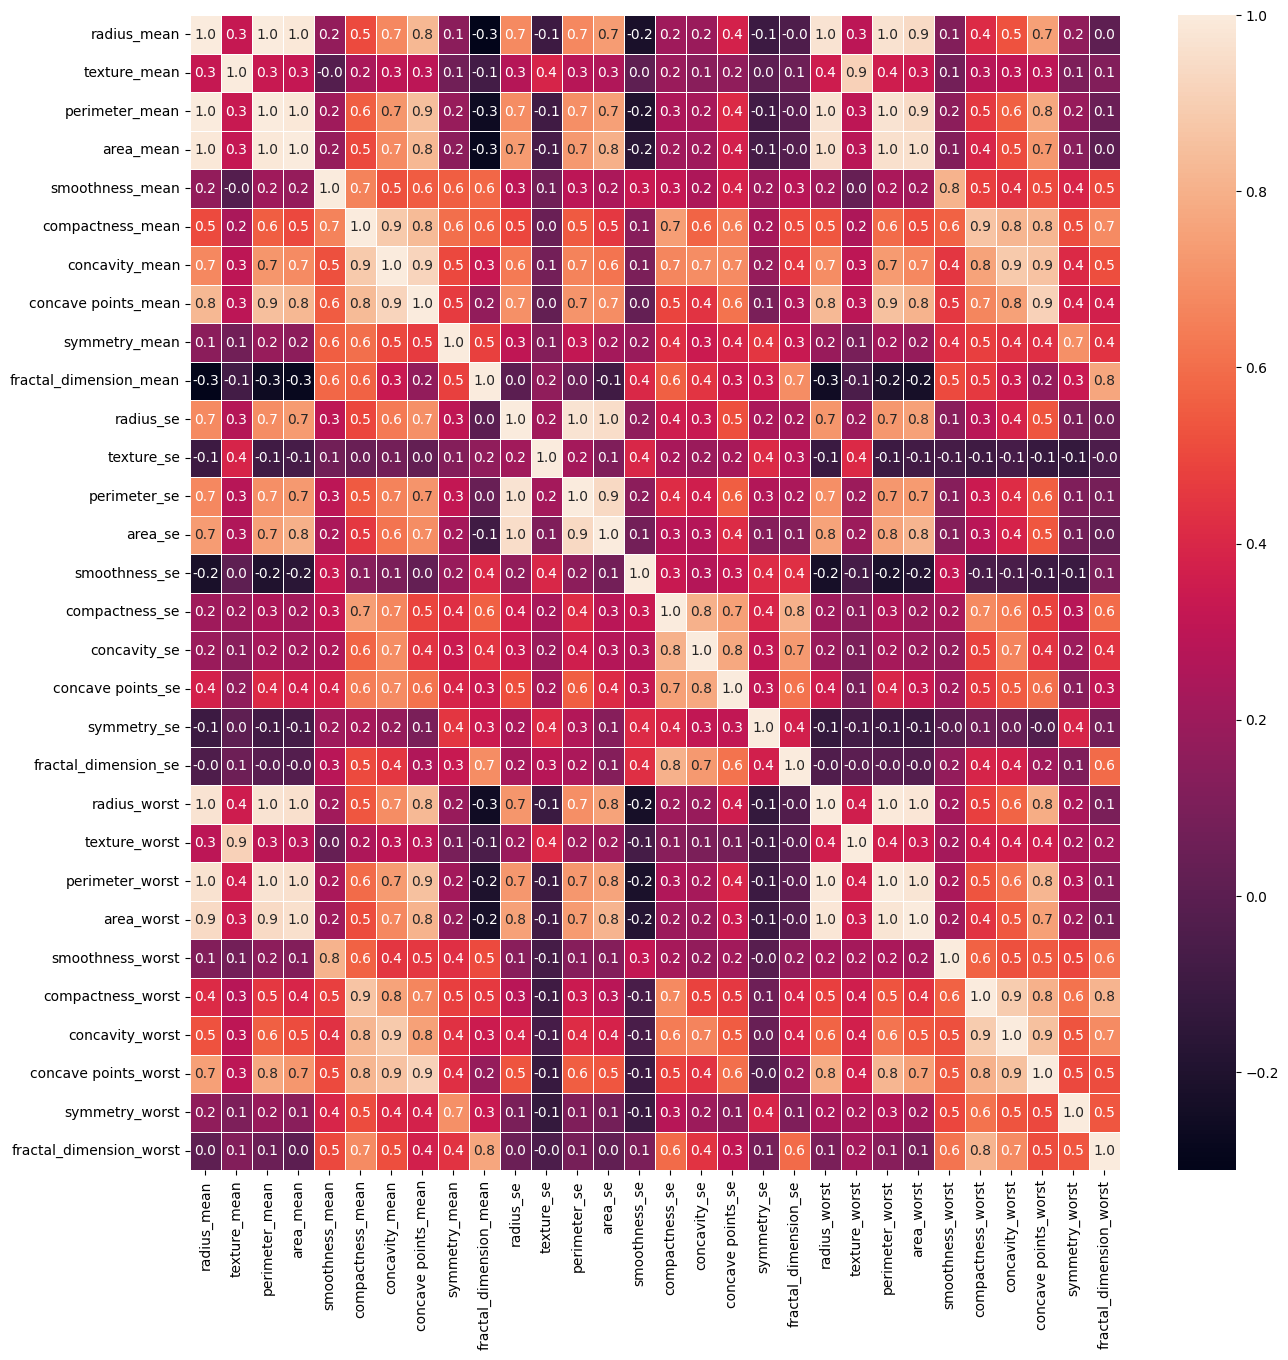

In [13]:
#correlation map
plt.figure(figsize=(15, 15))
sns.heatmap(df_breast_cancer.corr(numeric_only=True), annot=True, linewidths=.5, fmt= '.1f');

### Ejercicio 6:

Entrena (con validación cruzada) un modelo de RandomForestClassifier (con max_depth a 5) con todas las features (ojo incluso las que descartamos en el ejercicio 4) y guarda el perfomance ("balanced_accuracy") en test en una variable. Será nuestro base line de comparación

In [14]:
X_train = train_set.drop(target, axis = 1)
y_train = train_set[target] 

In [15]:
rfc = RandomForestClassifier(n_estimators=100, random_state=42, max_depth=5)

In [16]:
baseline = np.mean(cross_val_score(rfc,X_train,y_train, scoring = "balanced_accuracy", cv = 5))
print(f"Baseline: {baseline}%")

Baseline: 0.9387919305653296%


### Ejercicio 7

Vamos a emplear nuestras features del análisis visual pero descartando variables correladas entre sí (emplea la matriz ya obtenida en el ejercicio 5 o bien cualquier medio que creas conveniente). Descarta features y muestra la matriz de correlación para la selección final (recuerda, parte de la lista creada en el ejercicio 4)

In [17]:
drop_list = ['perimeter_mean','radius_mean','compactness_mean',
             'concave points_mean','radius_se','perimeter_se',
             'radius_worst','perimeter_worst','compactness_worst',
             'concave points_worst','compactness_se','concave points_se',
             'texture_worst','area_worst', 'area_se', 'concavity_mean',
             'fractal_dimension_mean','smoothness_mean']

features_visual_final  = [col for col in features_visual if col not in drop_list]

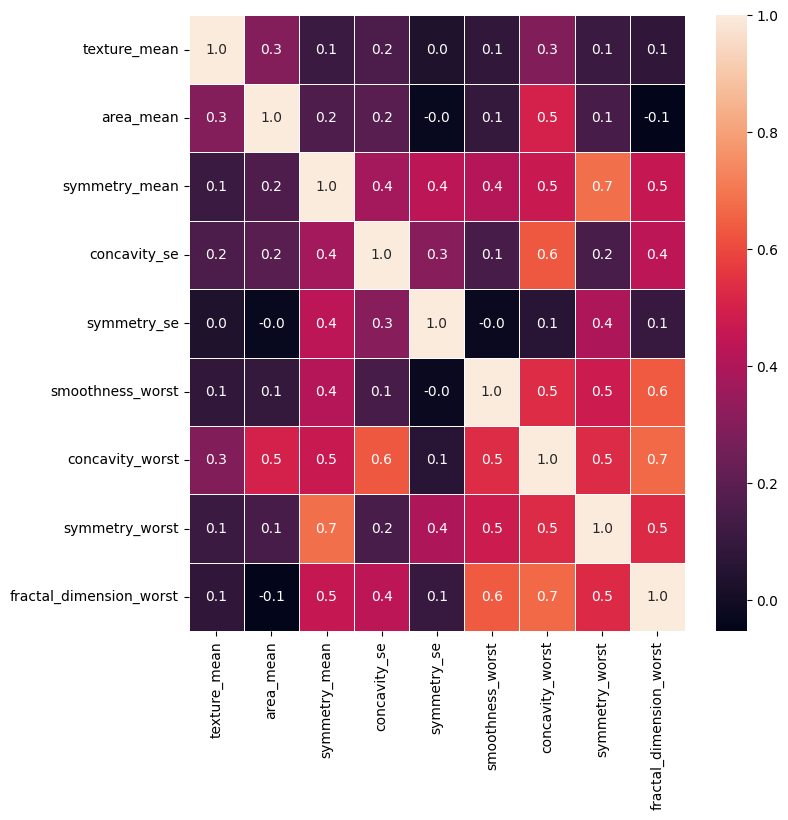

In [18]:
#correlation map
plt.figure(figsize=(8, 8))
sns.heatmap(X_train[features_visual_final].corr(), annot=True, linewidths=.5, fmt= '.1f');

### Ejercicio 8

Evalúa tu primer feature reduction. Entrena un modelo y evalúa su perfomance con los features que seleccionaste en el ejercicio anterios (emplea la validación cruzada)

In [19]:
#Train test split
X_train_visual = X_train[features_visual_final]

#Random Forest Classifier
rfc_1 = RandomForestClassifier(n_estimators=100, random_state=42, max_depth=5)

visual_score = np.mean(cross_val_score(rfc_1, X_train_visual, y_train, cv = 5, scoring= "balanced_accuracy"))
num_feats_visual = len(features_visual_final)
num_feats_baseline = len(X_train.columns)
print(f"Visual: {visual_score*100.0}%/{len(features_visual_final)} feats. vs Baseline: {baseline*100.0}%/{num_feats_baseline} feats.")

Visual: 94.2125263898663%/9 feats. vs Baseline: 93.87919305653296%/30 feats.


### Ejercicio 9

Prueba ahora a hacer una feature selection utilizando ANOVA. Compara la validación cruzada con la del modelo baseline y con la del modelo anterior. (Pista: SelectKbest)

In [20]:
# Encontrar las 5 mejores características
num_feats_anova = 5
select_feature = SelectKBest(f_classif, k=num_feats_anova).fit(X_train, y_train)

In [21]:
best_features_sorted = pd.DataFrame({'Feature': X_train.columns, 'Score': select_feature.scores_}).sort_values(by='Score', ascending=False)
features_anova = select_feature.get_feature_names_out()
best_features_sorted.head()

,Feature,Score
27,concave points_worst,662.320337
7,concave points_mean,616.646516
22,perimeter_worst,580.041174
20,radius_worst,547.254347
2,perimeter_mean,443.061554


In [22]:
print(features_anova)

['perimeter_mean' 'concave points_mean' 'radius_worst' 'perimeter_worst'
 'concave points_worst']


In [23]:
# Transformar el dataset a solo las 5 mejores características
X_train_anova = select_feature.transform(X_train)


#Random Forest Classifier
rfc_2 = RandomForestClassifier(n_estimators=100, random_state=42, max_depth=5)

anova_score = np.mean(cross_val_score(rfc_1, X_train_anova, y_train, cv = 5, scoring= "balanced_accuracy"))

print(f"ANOVA: {anova_score*100.0}%/{num_feats_anova} feats. vs Baseline: {baseline*100.0}%/{num_feats_baseline} feats.")

ANOVA: 92.35735397607317%/5 feats. vs Baseline: 93.87919305653296%/30 feats.


In [24]:
print([col for col in features_anova if col not in features_visual_final])

['perimeter_mean', 'concave points_mean', 'radius_worst', 'perimeter_worst', 'concave points_worst']


### Ejercicio 10

Prueba a hacer ahora una selección de features con RFE (Recursive Feature Elimination), hasta quedarte con 5 features. Evalúa perfomance en "balanced_accuracy" con cross_validation y compara con la baseline.

In [25]:
from sklearn.feature_selection import RFE

#Random Forest Classifier
rfc_3 = RandomForestClassifier(n_estimators=100, random_state=42, max_depth=5)

#Recursive Feature Elimination y entrenar el modelo
num_feats_rfe = 5
rfe = RFE(estimator=rfc_3, n_features_to_select= num_feats_rfe, step=1)
rfe = rfe.fit(X_train, y_train)
X_train_rfe = rfe.transform(X_train)

rfe_score = np.mean(cross_val_score(rfc_3, X_train_rfe, y_train, cv = 5, scoring= "balanced_accuracy"))

print(f"ANOVA: {rfe_score*100.0}%/{num_feats_anova} feats. vs Baseline: {baseline*100.0}%/{num_feats_baseline} feats.")

ANOVA: 92.42402064273986%/5 feats. vs Baseline: 93.87919305653296%/30 feats.


In [26]:
features_rfe = rfe.get_feature_names_out()
features_rfe

array(['concave points_mean', 'radius_worst', 'perimeter_worst',
       'area_worst', 'concave points_worst'], dtype=object)

### Ejercicio 11

Prueba a eliminar features con el modelo de RandomForestClassifier (emplea SelectFromModel de sklearn). Utiliza esta vez una regresión logística para entrenar con las features escogidas y compara con el baseline. Muestra primero la importancia obtenida con el modelo baseline (que básicamente es el mismo que vamos a usar con SelectFromModel). Prueba primero para features por encima de la mediana y luego para las 5 primeras.

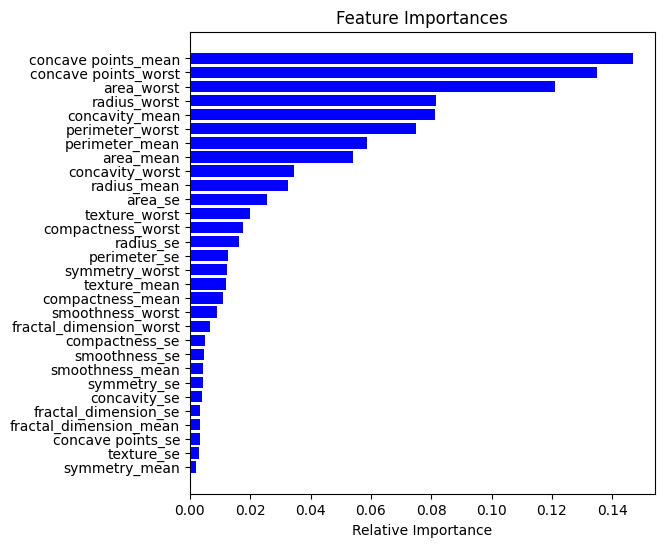

In [27]:
#mostramos la importancia de las características del modelo original (sin reducción de características)
rfc.fit(X_train,y_train)
importances = rfc.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(6, 6))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [X_train.columns[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

In [28]:
from sklearn.feature_selection import SelectFromModel


selector_model = SelectFromModel(estimator = rfc, threshold= "median") 
selector_model.fit(X_train,y_train)
print("Escogidas:", selector_model.get_feature_names_out())

Escogidas: ['radius_mean' 'perimeter_mean' 'area_mean' 'concavity_mean'
 'concave points_mean' 'radius_se' 'perimeter_se' 'area_se' 'radius_worst'
 'texture_worst' 'perimeter_worst' 'area_worst' 'compactness_worst'
 'concavity_worst' 'concave points_worst']


In [29]:
from sklearn.linear_model import LogisticRegression

lc_clf = LogisticRegression(max_iter = 1000)
X_train_model_median = selector_model.transform(X_train)
score_model_median = np.mean(cross_val_score(lc_clf, X_train_model_median, y_train, cv = 5, scoring = "balanced_accuracy"))
num_features_model_median = X_train_model_median.shape[1]
print(f"LR: {score_model_median*100.0}%/{num_features_model_median} feats. vs Baseline: {baseline*100.0}%/{num_feats_baseline} feats.")

LR: 92.99695050433967%/15 feats. vs Baseline: 93.87919305653296%/30 feats.


In [30]:
selector_model = SelectFromModel(estimator = rfc, threshold= "median", max_features= 5) 
selector_model.fit(X_train,y_train)
print("Escogidas:", selector_model.get_feature_names_out())

lc_clf = LogisticRegression(max_iter = 1000)
X_train_model_median = selector_model.transform(X_train)
score_model_median = np.mean(cross_val_score(lc_clf, X_train_model_median, y_train, cv = 5, scoring = "balanced_accuracy"))
num_features_model_median = X_train_model_median.shape[1]
print(f"LR: {score_model_median*100.0}%/{num_features_model_median} feats. vs Baseline: {baseline*100.0}%/{num_feats_baseline} feats.")

Escogidas: ['concavity_mean' 'concave points_mean' 'radius_worst' 'area_worst'
 'concave points_worst']
LR: 88.63654703260615%/5 feats. vs Baseline: 93.87919305653296%/30 feats.


### Ejercicio EXTRA:

Investiga RFECV y obten el número optimo de features siguiendo esta técnica pero con el "balanced_accuracy" como métrica.

In [31]:
#Rfe con cross validation
from sklearn.feature_selection import RFECV

rfc_4 = RandomForestClassifier() 
rfecv = RFECV(estimator=rfc_4, step=1, cv=5,scoring='balanced_accuracy')
rfecv = rfecv.fit(X_train, y_train)

print('Optimal number of features :', rfecv.n_features_)
print('Best features :', list(X_train.columns[rfecv.support_]))
print("Best features (alternative):", rfecv.get_feature_names_out())
print('Accuracy feat. reduction 4:', np.mean(cross_val_score(rfc_4, X_train[rfecv.get_feature_names_out()],y_train, cv = 5, scoring = "balanced_accuracy")))

Optimal number of features : 15
Best features : ['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'concavity_mean', 'concave points_mean', 'area_se', 'radius_worst', 'texture_worst', 'perimeter_worst', 'area_worst', 'smoothness_worst', 'concavity_worst', 'concave points_worst', 'symmetry_worst']
Best features (alternative): ['radius_mean' 'texture_mean' 'perimeter_mean' 'area_mean'
 'concavity_mean' 'concave points_mean' 'area_se' 'radius_worst'
 'texture_worst' 'perimeter_worst' 'area_worst' 'smoothness_worst'
 'concavity_worst' 'concave points_worst' 'symmetry_worst']
Accuracy feat. reduction 4: 0.9529068730940653


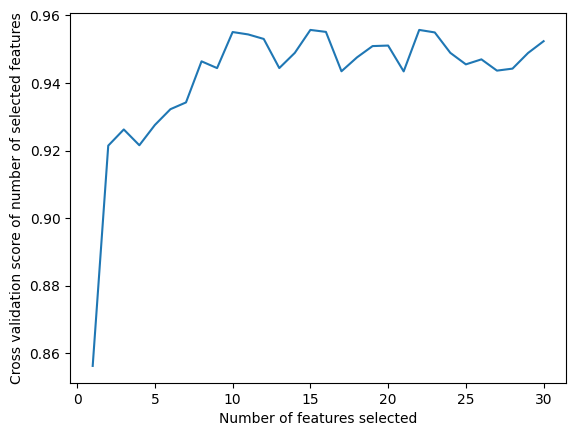

In [32]:
# Plot number of features VS. cross-validation scores
import matplotlib.pyplot as plt
plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score of number of selected features")
plt.plot(range(1, len(rfecv.cv_results_['mean_test_score']) + 1), rfecv.cv_results_['mean_test_score'])
plt.show()

In [33]:
rfc.feature_importances_.shape

(30,)

NameError: name 'X' is not defined

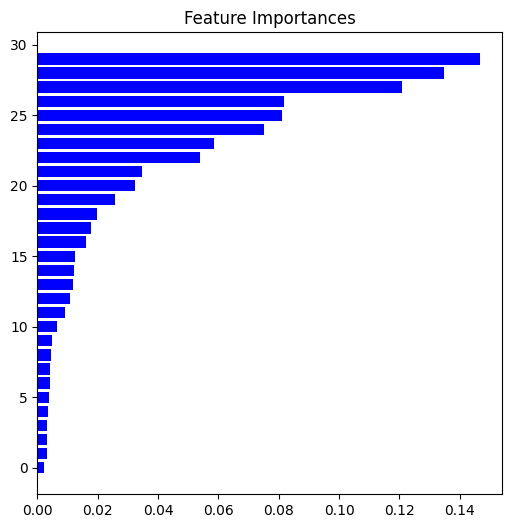

In [34]:
#Graficar la importancia de las características del modelo original (sin reducción de características)
importances = rfc.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(6, 6))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [X.columns[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()